In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
#import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats
from defs import lon180, mmm, stad, mask

In [2]:
folder = 'Data_processed/'
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

In [3]:
#Open and calculate SSS
dsE280s = xr.open_dataset(folder+'MMM_ensemble/E280/so_1x1_100yr.nc')
dsEoi400s = xr.open_dataset(folder+'MMM_ensemble/Eoi400/so_1x1_100yr.nc')
dsgrid = xr.open_dataset(folder+'1x1grid.nc')

area = dsgrid.area

sssE280 = mmm(dsE280s.so[:,0])
sssEoi400 = mmm(dsEoi400s.so[:,0])

sssstd = stad(dsEoi400s.so[:,0]-dsE280s.so[:,0])

/Users/6497241/opt/anaconda3/envs/myenv4/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [4]:
#Open and calculate precipitation
dsE280pr = xr.open_dataset(folder+'MMM_ensemble/E280/pr_100yr.nc')
dsEoi400pr = xr.open_dataset(folder+'MMM_ensemble/Eoi400/pr_100yr.nc')

prE280 = mmm(dsE280pr.pr)
prEoi400 = mmm(dsEoi400pr.pr)

prstd = stad(dsEoi400pr.pr-dsE280pr.pr)

In [5]:
#Open and calculate PmE
dsE280pme = xr.open_dataset(folder+'MMM_ensemble/E280/pme_100yr.nc')
dsEoi400pme = xr.open_dataset(folder+'MMM_ensemble/Eoi400/pme_100yr.nc')

pmeE280 = mmm(dsE280pme.pme)
pmeEoi400 = mmm(dsEoi400pme.pme)

pmestd = stad(dsEoi400pme.pme-dsE280pme.pme)

In [6]:
#Open and calculate sea-ice cover
dsE280 = xr.open_dataset(folder+'MMM_ensemble/E280/SI_100yr.nc')
dsEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/SI_100yr.nc')

siE280 = mmm(dsE280.si_mean)
siEoi400 = mmm(dsEoi400.si_mean)

In [7]:
#Create masks for significance
coords, masksss = mask(dsE280s.so[:,0], dsEoi400s.so[:,0], sssEoi400, 12)
coords, maskpr = mask(dsE280pr.pr, dsEoi400pr.pr, prEoi400, 12)
coords, maskpme = mask(dsE280pme.pme, dsEoi400pme.pme, pmeEoi400, 12)

/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62022/4003868008.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap0 = plt.cm.get_cmap("cmo.rain",6).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62022/4003868008.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = plt.cm.get_cmap("cmo.ice").copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62022/4003868008.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = p

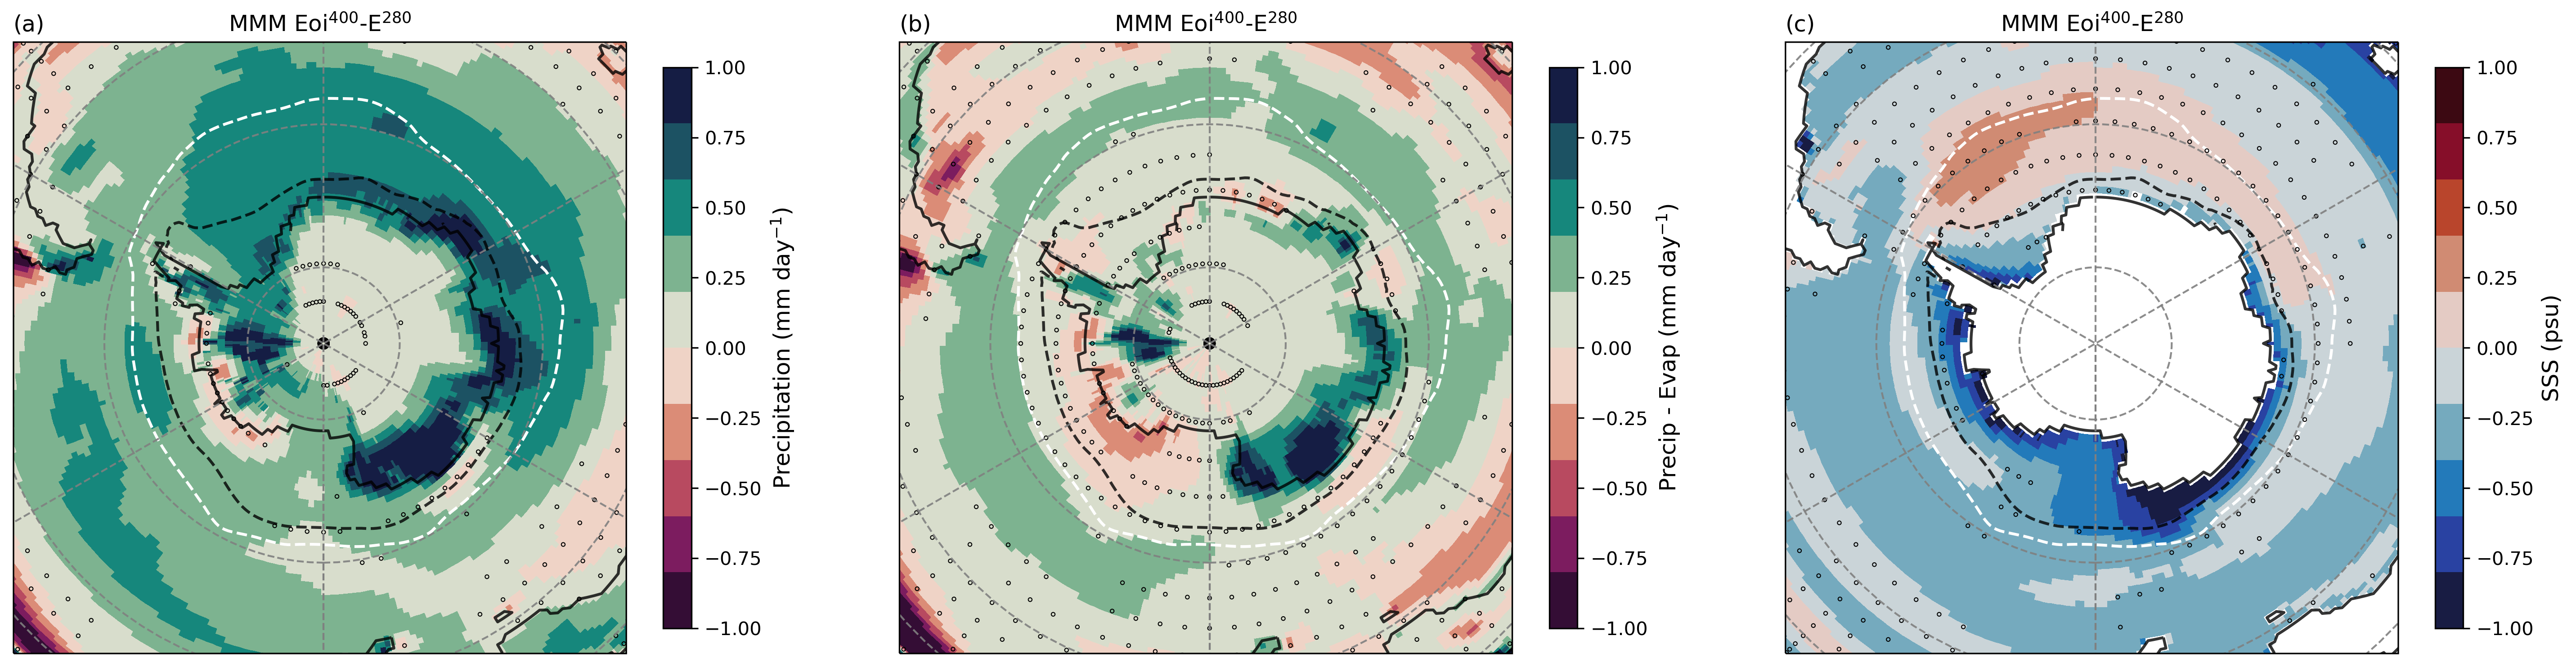

In [8]:
## creeer je figuur:
fig = plt.figure(figsize=(24,6), dpi=300)
## creeer je assen. Ik voeg hier de projectie 'plate carree' toe, Cartopy heeft verschillende, bijv EqualEarth
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0)

cmap0 = plt.cm.get_cmap("cmo.rain",6).copy()

cmap1 = plt.cm.get_cmap("cmo.ice").copy()
cmap1.set_under('lightgrey')

cmap2 = plt.cm.get_cmap("cmo.curl_r",10).copy()

cmap3 = plt.cm.get_cmap("cmo.balance",10).copy()

cmap4 = plt.cm.get_cmap("cmo.rain",5).copy()

iceline = 15

ax = fig.add_subplot(131, projection=proj)
im=ax.pcolormesh(prE280.lon,prE280.lat,(prEoi400-prE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['black','black'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpr==0)[::5,::5], coords.lat2D.where(maskpr==0)[::5,::5], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precipitation (mm day$^{-1}$)', fontsize=12)
ax.set_title(r'MMM Eoi$^{400}$-E$^{280}$', loc='center')
ax.set_title(r'(a)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax = fig.add_subplot(132, projection=proj)
im=ax.pcolormesh(prE280.lon,prE280.lat,(pmeEoi400-pmeE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpme==0)[::5,::5], coords.lat2D.where(maskpme==0)[::5,::5], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precip - Evap (mm day$^{-1}$)', fontsize=12)
ax.set_title(r'MMM Eoi$^{400}$-E$^{280}$', loc='center')
ax.set_title(r'(b)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax = fig.add_subplot(133, projection=proj)
im=ax.pcolormesh(prE280.lon,prE280.lat,(sssEoi400-sssE280), transform=ccrs.PlateCarree(), cmap=cmap3, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(masksss==0).where(siE280>=0)[::5,::5], coords.lat2D.where(masksss==0).where(siE280>=0)[::5,::5], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SSS (psu)', fontsize=12)
ax.set_title(r'MMM Eoi$^{400}$-E$^{280}$', loc='center')
ax.set_title(r'(c)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

#plt.savefig('Fig2.png', bbox_inches='tight')
plt.show()

In [9]:
#Changes in precipitation: SO and Antarctica

In [10]:
abssopr = (dsEoi400pr.pr-dsE280pr.pr).where(dsE280s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
relsopr = abssopr/((dsE280pr.pr).where(dsE280s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')).values*100
print('Absolute MMM Southern Ocean precipitation anomaly is %.2f mm' %abssopr)
print('Relative MMM Southern Ocean precipitation anomaly is %.0f %%' %relsopr)

Absolute MMM Southern Ocean precipitation anomaly is 0.35 mm
Relative MMM Southern Ocean precipitation anomaly is 14 %


In [11]:
absantpr = (dsEoi400pr.pr-dsE280pr.pr).where(dsE280s.so[:,0].fillna(-100)==-100).sel(lat=slice(-90,-60)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
relantpr = absantpr/((dsE280pr.pr).where(dsE280s.so[:,0].fillna(-100)==-100).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')).values*100
print('Absolute MMM Antarctica precipitation anomaly is %.2f mm' %absantpr)
print('Relative MMM Antarctica precipitation anomaly is %.0f %%' %relantpr)

Absolute MMM Antarctica precipitation anomaly is 0.36 mm
Relative MMM Antarctica precipitation anomaly is 50 %


In [12]:
#Changes in PmE: SO

In [13]:
abspme = (dsEoi400pme.pme-dsE280pme.pme).where(dsEoi400s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
relpme = abspme/(dsE280pme.pme.where(dsE280s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values)*100
print('Absolute MMM Southern Ocean PmE anomaly is %.2f mm' %abspme)
print('Relative MMM Southern Ocean PmE anomaly is %.0f %%' %relpme)

Absolute MMM Southern Ocean PmE anomaly is 0.13 mm
Relative MMM Southern Ocean PmE anomaly is 10 %


In [14]:
#Changes in salinity SO

In [15]:
sosalanom = (dsEoi400s.so[:,0]-dsE280s.so[:,0]).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
sominsalanom = mmm(dsEoi400s.so[:,0]-dsE280s.so[:,0]).sel(lat=slice(-90,-45)).min().values
print('MMM Southern Ocean SSS anomaly is %.2f psu' %sosalanom)
print('MMM maximum Southern Ocean SSS decrease is %.1f psu' %sominsalanom)

MMM Southern Ocean SSS anomaly is -0.17 psu
MMM maximum Southern Ocean SSS decrease is -3.0 psu
